# Imports and program variables


In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam¶¶
from keras.utils import np_utils
from sklearn import metrics
import pandas as pd

from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split # to split dataset into train and test
from sklearn import preprocessing

from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

In [13]:
# Time series loader
import sys
sys.path.append("..")
from time_series_dataset_loader import TimeSeriesDatasetLoader

## Setting up train and test datasets function

In [14]:
def data():
    
    # Setting Dataset path
    DATASET_PATH = '../../datasets/Original/MFCC/'
    
    # Importing X and y
    dataset_loader = TimeSeriesDatasetLoader(DATASET_PATH)
    X, y = dataset_loader.get_dataset('emotion_type')
    X = np.asarray(X)
    y = np.asarray(y)
    
    # Apply Pad Sequences
    max_len = len(X[0])
    for row in X:
        if len(row) > max_len:
            max_len = len(row)
    X = pad_sequences(X, maxlen=max_len, padding='post')
    
    # Split the dataset in train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
    
    # Reshaping to apply smote
    shape_0 = X_train.shape[0]
    shape_1 = X_train.shape[1]
    shape_2 = X_train.shape[2]
    X_train = X_train.reshape(shape_0, shape_1 * shape_2)

    # Apply SMOTE
    smt = SMOTE()
    X_train, y_train = smt.fit_sample(X_train, y_train)

    # Reshaping back to original shape dimensions 1 and 2
    X_train = X_train.reshape(X_train.shape[0], shape_1, shape_2)
    
    # Create categorical matrices
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    # Reshaping X to fit model
    num_rows = X[0].shape[0]
    num_columns = X[0].shape[1]
    num_channels = 1

    X_train = X_train.reshape(X_train.shape[0], num_rows, num_columns, num_channels)
    X_test = X_test.reshape(X_test.shape[0], num_rows, num_columns, num_channels)
    ¶¶¶¶
    return X_train, y_train, X_test, y_test

## Building, Compiling and Fitting Model function

In [18]:
def create_model(X_train, y_train, X_test, y_test):
    
    # Construct model
    model = Sequential()¶([64, 128])}}, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout({{uniform(0, 1)}}))

    model.add(Conv2D(filters={{choice([64, 128])}}, kernel_size=2, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout({{uniform(0, 1)}}))

    model.add(Conv2D(filters={{choice([32, 64])}}, kernel_size=2, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(GlobalAveragePooling2D())

    model.add(Dense(3, activation='softmax'))
    
    # Compile the keras model
    model.compile(loss='categorical_crossentropy', optimizer={{choice(['rmsprop', 'adam', 'sgd'])}}, metrics=['accuracy'])
    
    # Define bath and epochs
    batch_size ={{choice([64,128])}}
    epochs = 10
    
    # Callbacks and fitting model
    lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.0000001)
    mcp_save = ModelCheckpoint('../model_checkpoints/hyperopt_test.h5', save_best_only=True, monitor='val_loss', mode='min')
    result=model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data=(X_test, y_test), callbacks=[mcp_save, lr_reduce], verbose=2)
    
    # Get the highest validation accuracy of the training epochs
    validation_acc = np.amax(result.history['val_accuracy']) 
    print('Best validation acc of epoch:', validation_acc)
    
    # Model Summary
    model.summary()

    # PLT History info
    plt.plot(result.history['loss'])
    plt.plot(result.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}

## Finding hyperopt parameters and evaluating

>>> Imports:
#coding=utf-8

try:
    import numpy as np
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import Dense, Dropout, Activation, Flatten
except:
    pass

try:
    from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
except:
    pass

try:
    from keras.optimizers import Adam
except:
    pass

try:
    from keras.utils import np_utils
except:
    pass

try:
    from sklearn import metrics
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers.recurrent import LSTM
except:
    pass

try:
    from keras.layers import Dense
except:
    pass

try:
    from keras.optimizers import Adam
except:
    pass

try:
    from keras.utils import to_categorical
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import Dense, Dropout, Flatten, Act

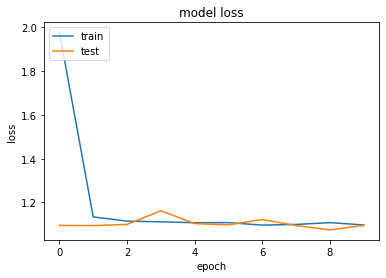

Train on 1392 samples, validate on 350 samples                                   
Epoch 1/10                                                                       
 - 19s - loss: 2.3433 - accuracy: 0.3542 - val_loss: 1.1559 - val_accuracy: 0.5743

Epoch 2/10                                                                       
 - 19s - loss: 1.3472 - accuracy: 0.3542 - val_loss: 1.0605 - val_accuracy: 0.5686

Epoch 3/10                                                                       
 - 19s - loss: 1.1945 - accuracy: 0.3585 - val_loss: 1.0718 - val_accuracy: 0.5743

Epoch 4/10                                                                       
 - 20s - loss: 1.1295 - accuracy: 0.3879 - val_loss: 1.0965 - val_accuracy: 0.2743

Epoch 5/10                                                                       
 - 19s - loss: 1.1125 - accuracy: 0.3700 - val_loss: 1.0966 - val_accuracy: 0.2686

Epoch 6/10                                                                       
 - 20s

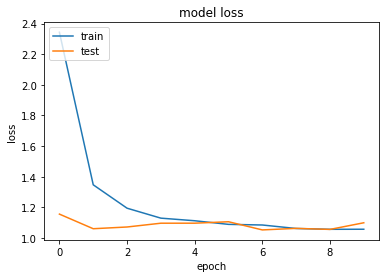

Train on 1392 samples, validate on 350 samples                                   
Epoch 1/10                                                                       
 - 15s - loss: 9.6096 - accuracy: 0.3290 - val_loss: 1.6613 - val_accuracy: 0.2686

Epoch 2/10                                                                       
 - 15s - loss: 3.6041 - accuracy: 0.3441 - val_loss: 1.6267 - val_accuracy: 0.2686

Epoch 3/10                                                                       
 - 16s - loss: 2.6172 - accuracy: 0.3391 - val_loss: 1.2977 - val_accuracy: 0.2686

Epoch 4/10                                                                       
 - 15s - loss: 2.1556 - accuracy: 0.3549 - val_loss: 1.2686 - val_accuracy: 0.2686

Epoch 5/10                                                                       
 - 15s - loss: 1.8484 - accuracy: 0.3714 - val_loss: 1.2188 - val_accuracy: 0.2686

Epoch 6/10                                                                       
 - 15s

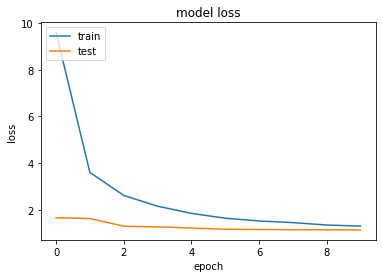

100%|██████████| 3/3 [08:23<00:00, 167.74s/trial, best loss: -0.5742856860160828]


In [19]:
best_run, best_model = optim.minimize(model=create_model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=3,
    
    model.add(Conv2D(filters={{choice                                  trials=Trials(),
                                      notebook_name='HyperoptTry')

In [21]:
X_train, Y_train, X_test, Y_test = data()
print("Evalutation of best performing model:")
print(best_model.metrics_names)
print(best_model.evaluate(X_test, Y_test))
print("Best performing model chosen hyper-parameters:")
print(best_run)

Evalutation of best performing model:
['loss', 'accuracy']
350/350 [==============================] - 1s 3ms/step
[1.0784910181590488, 0.31142857670783997]
Best performing model chosen hyper-parameters:
{'Dropout': 0.43404126142165134, 'Dropout_1': 0.6975075528853121, 'Dropout_2': 0.5152808649614491, 'batch_size': 0, 'filters': 0, 'filters_1': 1, 'filters_2': 0, 'optimizer': 0}
